In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xbudget
import regionate
import xwmt
import xwmb
import xgcm
import cartopy.crs as ccrs
import CM4Xutils #needed to run: pip install nc-time-axis
from regionate import MaskRegions, GriddedRegion
import seaborn as sns
import sys
sys.path.insert(0, '/vortexfs1/home/anthony.meza/scratch/CM4XTransientTracers/src')
from src import *
sns.set_style("darkgrid")

In [3]:
print('xgcm version', xgcm.__version__, '\nregionate version', regionate.__version__, '\nxwmt version', xwmt.__version__, '\nxwmb version', xwmb.__version__)

xgcm version 0.8.2.dev15+g7492277 
regionate version 0.1.1 
xwmt version 0.3.0 
xwmb version 0.2.1


In [4]:
import xarray as xr
import numpy as np

In [5]:
datadir = lambda x="" : "/vortexfs1/home/anthony.meza/scratch/CM4XTransientTracers/data/" + x
ds_budget = xr.open_mfdataset(
        datadir("model/budgets_sigma2_1p5/CM4Xp125_budgets_sigma2_1885-1889.zarr"),
        data_vars="minimal",
        coords="minimal",
        compat="override",
        parallel=True,
        engine="zarr")

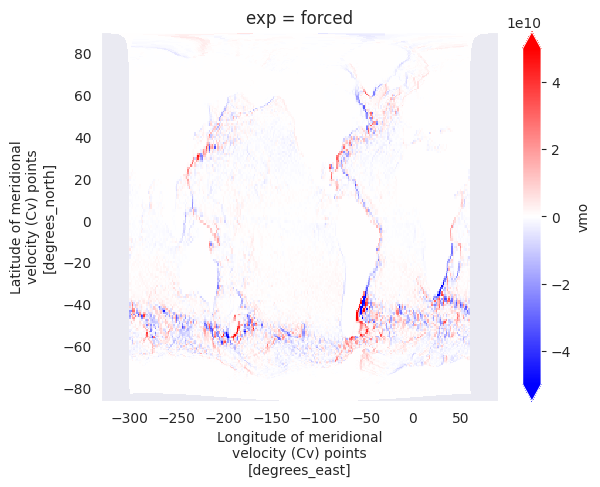

In [23]:
approx_d = ds_budget.vmo.sum("sigma2_l").isel(exp = 0).mean('time').compute()
approx_d.plot(x = "geolon_v", y = "geolat_v", vmin = -5e10, vmax = 5e10, cmap = "bwr")

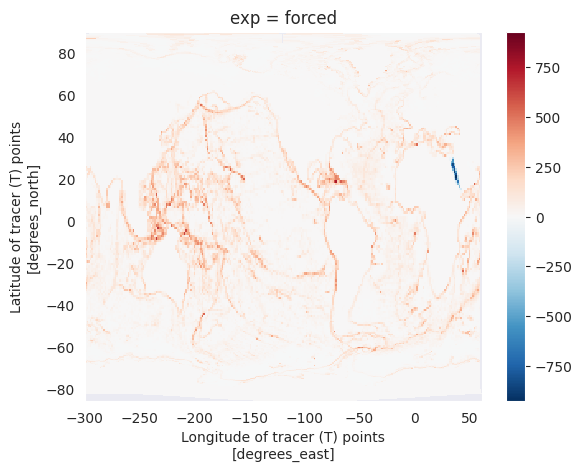

In [24]:
approx_d = ds_budget.thkcello.sum("sigma2_l").isel(exp = 0).mean('time').compute()
d = ds_budget.deptho.compute() 
(approx_d -d).plot(x = "geolon", y = "geolat")

In [6]:
ds_budget["z"] = approximate_z_top_down(ds_budget, dim = "sigma2")

In [7]:
ds_budget["z_boundaries"] = approximate_z_on_boundaries_top_down(ds_budget, dim = "sigma2")

In [8]:
ds_budget["z_min"] = ds_budget["z"].min("sigma2_l")
ds_budget["z_boundary_min"] = ds_budget["z_boundaries"].min("sigma2_i")

In [9]:
ds_location = ds_budget[["z_min", "z_boundary_min", "thkcello"]].isel(xh = 120, yh = 120)
# ds_location = ds_location.where(ds_location.thkcello.fillna(0.0) > 0)

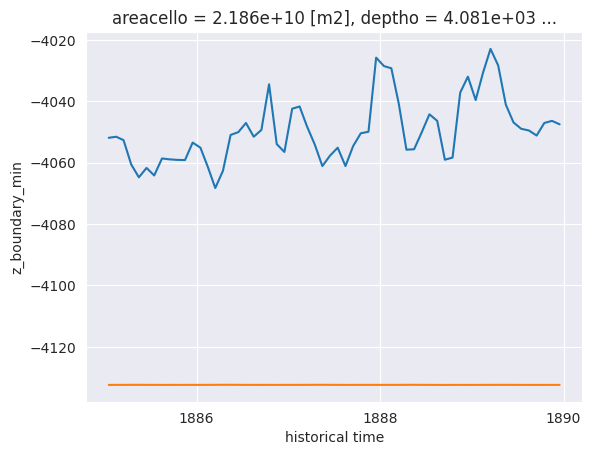

In [13]:
ds_location["z_min"].isel(exp = 0).plot()
ds_location["z_boundary_min"].isel(exp = 0).plot()

In [24]:
len(stretched_sigma_song_haidvogel(12, 5000, eta = 30))

13

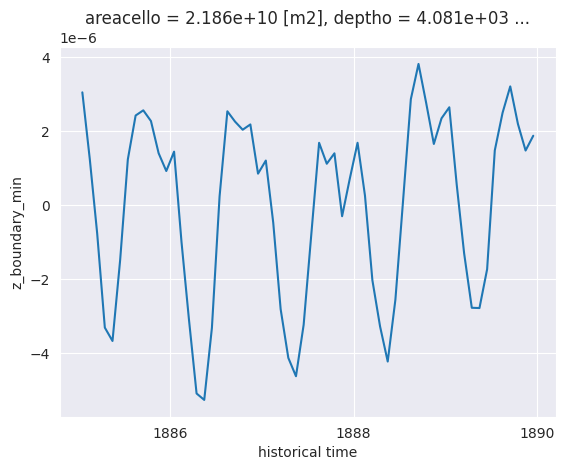

In [37]:
diff = ds_location["z_boundary_min"].isel(exp = 0) - ds_location["z_boundary_min"].isel(exp = 0).mean("time")
perc_diff_mean = diff /  ds_location["z_boundary_min"].isel(exp = 0).mean("time").compute()
perc_diff_mean.plot()

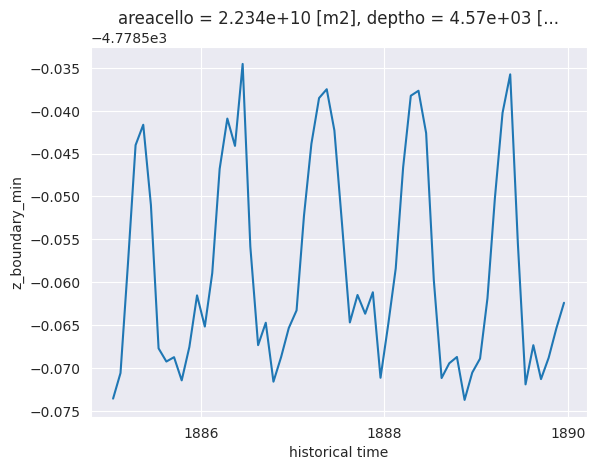

In [25]:
ds_location["z_boundary_min"].isel(exp = 0).plot()

In [16]:
ds_location["z_min"].compute().plot()
(-ds_location["z_boundary_min"].compute()).plot()


KeyboardInterrupt



In [121]:
ds_location["z"].idxmax(dim = "sigma2_l").compute()

<xarray.DataArray 'sigma2_l' (time: 60, yh: 180, xh: 240)> Size: 21MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) object 480B 2020-01-16 12:00:00 ... 2024-12-16 12:00:00
  * xh       (xh) int64 2kB 0 1 2 3 4 5 6 7 ... 232 233 234 235 236 237 238 239
  * yh       (yh) int64 1kB 0 1 2 3 4 5 6 7 ... 172 173 174 175 176 177 178 179